<a href="https://colab.research.google.com/github/nephylum/DS-Unit1-Project/blob/master/Project_1_Steam_Game_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are Popular Games Plagued with Casual Players?
##A look at data from Steam users

-By Eric Ramon

Using Data from:
https://www.kaggle.com/tamber/steam-video-games

#Are more popular games played less than average?

Surely, the more popular the game, the more players will be willing to get it and play for a short time, lowering the total average of time playing the game. 

Let's find out if that is true by looking at a dataset from steam containing over 100k unique users play data.


In [2]:
#import data
import pandas as pd

df = pd.read_csv('steam-200k.csv',names=['user_id', 'game','pur_pl',
                                          'tf_or_hrs', 'duh'])
print(df.shape)
df.head()

(200000, 5)


,user_id,game,pur_pl,tf_or_hrs,duh
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [3]:
#drop useless column filled with 0 I labled 'duh'
df = df.drop(['duh'], axis=1)
df.head()

,user_id,game,pur_pl,tf_or_hrs
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
#create a new dataset for playtime and drop play column
playtime = df[df['pur_pl'] == 'play']
playtime = playtime.drop(['pur_pl'], axis=1)
playtime.head()

,user_id,game,tf_or_hrs
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9


In [5]:
#find the top 10 most played games and save to ttmpg
ttmpg = playtime['game'].value_counts()[:10]
ttmpg

Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Name: game, dtype: int64

In [6]:
#find the total unique users
unique_users = len(playtime['user_id'].value_counts())
unique_users

11350

In [0]:
#Get percentage of total steam user ownership
ttplay = (ttmpg / unique_users) * 100


In [0]:
import matplotlib.pyplot as plt
import numpy as np

#Let's look at the top 10 games by total ownership

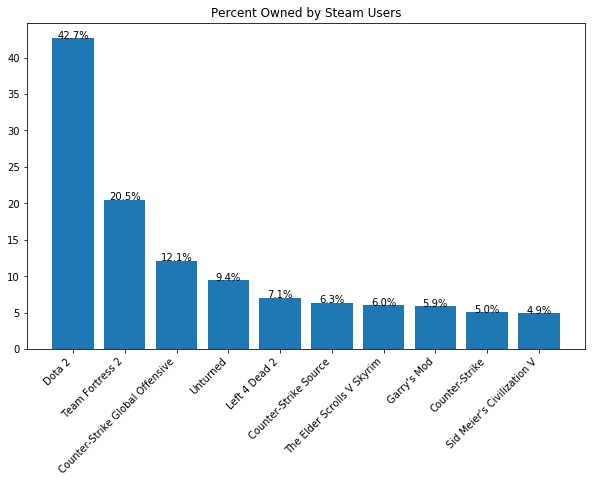

In [9]:
fig = plt.figure(figsize=(10,6))
plt.bar(ttplay.index, ttplay)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Percent Owned by Steam Users')

for x,y in zip(ttplay.index, ttplay):
  plt.annotate("{:.1f}%".format(y),(x,y), horizontalalignment='center')

plt.show()

In [0]:
def getm_m(hours):
  mn = np.mean(hours)
  mx = np.max(hours)
  sm = np.sum(hours)
  stdv = np.std(hours)
  return (mx, mn, sm, stdv)

In [0]:
#get the top ten games and the top ten games mean and max hours
tste = [0] * 10
tt = [0] * 10
for x in range(0,10):
  tt[x] = playtime[playtime['game'] == ttplay.index[x]]
  tste[x] = getm_m(tt[x].tf_or_hrs)


In [0]:
tste = pd.DataFrame(tste)

In [13]:
#find the Percentage of Total PlayTime and Mean Total PlayTime
tpt = np.sum(playtime['tf_or_hrs'])
ptpt = (tste[:][2] / tpt)*100
mtpt = np.mean(playtime.tf_or_hrs)
mtpt

48.878063243911484

#How much total playtime has been played in each of the top 10 games?

It looks like the popular games seem to have players that play quite a lot.

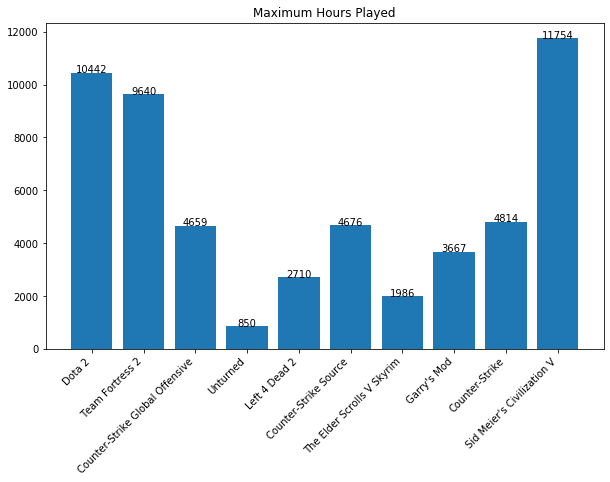

In [14]:
#Plot Max Hours
fig= plt.figure(figsize=(10,6))
plt.bar(ttplay.index, tste[:][0])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Maximum Hours Played')

for x,y in zip(ttplay.index, tste[:][0]):
  plt.annotate("{:.0f}".format(y),(x,y), horizontalalignment='center')

plt.show()

#Alright, let's take a look at the average playtime for the top 10 games

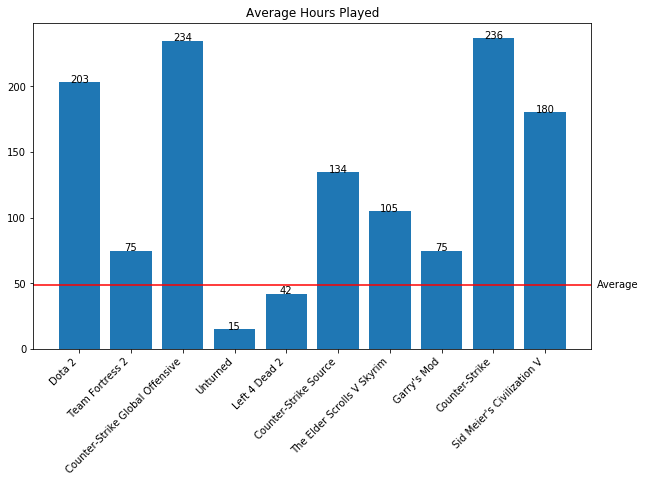

In [15]:
#Plot Mean Hours add line for Average (mean) hours played
fig = plt.figure(figsize=(10,6))
plt.bar(ttplay.index, tste[:][1])
plt.axhline(y=mtpt,xmin=0,xmax=10, color='red')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Average Hours Played')
plt.text(10,47,s='Average')

for x,y in zip(ttplay.index, tste[:][1]):
  plt.annotate("{:.0f}".format(y),(x,y), horizontalalignment='center')

plt.show()

#Looks like my original hypothesis was wrong
Let's take a look at total hours played as a percentage of total playtime

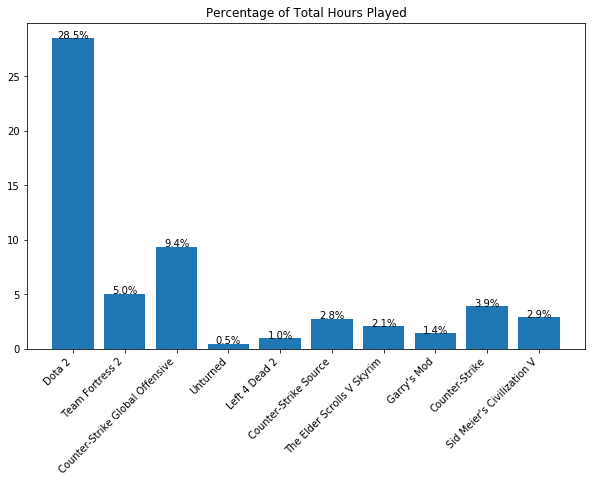

In [16]:
#plot Percentage of Total hours PlayTime
fig = plt.figure(figsize=(10,6))
plt.title('Percentage of Total Hours Played')
plt.bar(ttplay.index, ptpt)
plt.xticks(rotation=45, horizontalalignment='right')
# plt.ylabel('Percent %')

for x,y in zip(ttplay.index, ptpt):
  plt.annotate("{:.1f}%".format(y),(x,y), horizontalalignment='center')

plt.show()

In [0]:
#find total std of all games
t_std = np.std(playtime.tf_or_hrs)

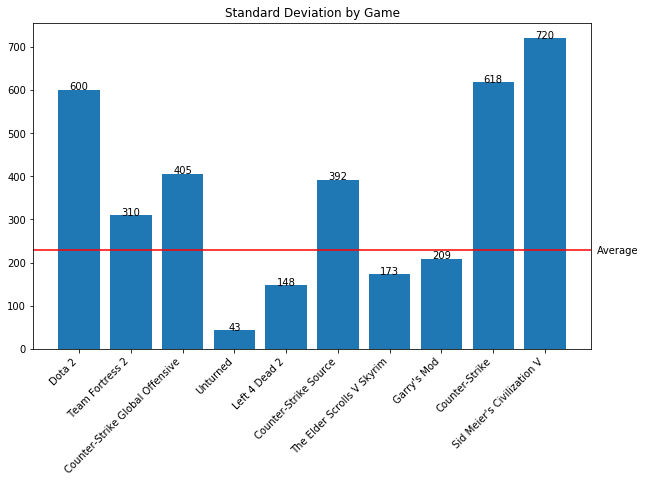

In [18]:
#Plot Standard Deviation by Game
fig= plt.figure(figsize=(10,6))
plt.bar(ttplay.index, tste[:][3])
plt.xticks(rotation=45, horizontalalignment='right')
plt.axhline(y=t_std,xmin=0,xmax=10, color='red')
plt.title('Standard Deviation by Game')
plt.text(10,220,s='Average')

for x,y in zip(ttplay.index, tste[:][3]):
  plt.annotate("{:.0f}".format(y),(x,y), horizontalalignment='center')

plt.show()

##In conclusion, while more players may mean more players who play less than the average amount of hours, it seems that there are dedicated players who put in far above the average, raising to total average for the popular game.